In [1]:
from google.colab import drive
drive.mount("/content/drive")

file_path = "/content/drive/My Drive/D&C/MOSAIKS/Poverty_Mapping/Trial1/"

Mounted at /content/drive


**Data Preparation**

In [2]:
import numpy as np
import pandas as pd

# Reading the csv for the gps file
gps_raw = pd.read_csv(file_path + 'Geographic Dataset.csv')
gps_raw.rename(columns = {'DHSCLUST':'CLUSTNUM'}, inplace = True)
gps_raw.head()

,X,Y,DHSID,DHSCC,DHSYEAR,CLUSTNUM,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,120.564542,18.271892,PH201700000386,PH,2017.0,386.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.271892,120.564542,9999.0,17.0,WGS84
1,120.568506,18.202195,PH201700000387,PH,2017.0,387.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,U,18.202195,120.568506,9999.0,10.0,WGS84
2,120.691113,18.073914,PH201700000388,PH,2017.0,388.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.073914,120.691113,9999.0,39.0,WGS84
3,120.510203,18.061017,PH201700000389,PH,2017.0,389.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.061017,120.510203,9999.0,13.0,WGS84
4,120.663074,18.155694,PH201700000390,PH,2017.0,390.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.155694,120.663074,9999.0,126.0,WGS84


In [ ]:
len(gps_raw)

1250

In [3]:
# Adding the corresponding radius
gps_raw['RADIUS(KM)'] = np.where(gps_raw['URBAN_RURA'] == 'U', 2, 10)

# Selecting relevant columns only
gps = gps_raw[['DHSID', 'CLUSTNUM', 'URBAN_RURA', 'RADIUS(KM)', 'LATNUM', 'LONGNUM',]]
gps 

,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LATNUM,LONGNUM
0,PH201700000386,386.0,R,10,18.271892,120.564542
1,PH201700000387,387.0,U,2,18.202195,120.568506
2,PH201700000388,388.0,R,10,18.073914,120.691113
3,PH201700000389,389.0,R,10,18.061017,120.510203
4,PH201700000390,390.0,R,10,18.155694,120.663074
...,...,...,...,...,...,...
1245,PH201700000722,722.0,R,10,12.480412,122.014801
1246,PH201700000723,723.0,R,10,12.332112,121.948492
1247,PH201700000724,724.0,R,10,12.825163,122.082036
1248,PH201700000725,725.0,R,10,12.506513,122.308962


In [4]:
gps.rename(columns = {'LATNUM':'LAT_GPS', 'LONGNUM':'LON_GPS'}, inplace = True)
gps.head()

<ipython-input-4-e99ea2f85b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps.rename(columns = {'LATNUM':'LAT_GPS', 'LONGNUM':'LON_GPS'}, inplace = True)


,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS
0,PH201700000386,386.0,R,10,18.271892,120.564542
1,PH201700000387,387.0,U,2,18.202195,120.568506
2,PH201700000388,388.0,R,10,18.073914,120.691113
3,PH201700000389,389.0,R,10,18.061017,120.510203
4,PH201700000390,390.0,R,10,18.155694,120.663074


In [5]:
# Dropping the rows with 0 lonlat
gps_no_zeros = gps[~( gps[['LAT_GPS','LON_GPS']] == 0).all(axis=1)]
len(gps_no_zeros)

1214

In [ ]:
# Saving the file to csv so we could input it in MOSAIKS API

# labeled_no_zeros.to_csv('labeled_no_zeros.csv', index=False)
# labeled_no_zeros.to_csv(file_path + 'labeled_no_zeros.csv')

**MOSAIKS Features**

In [6]:
# Reading the output of the MOSAIKS API
gps_mosaiks_features = pd.read_csv(file_path + 'gps_mosaiks_features.csv')
gps_mosaiks_features.rename(columns = {'Lat':'LAT_MOSAIKS', 'Lon':'LON_MOSAIKS'}, inplace = True)

# Adding index
gps_mosaiks_features['MOSAIKSID'] = gps_mosaiks_features.index
gps_mosaiks_features.insert(0, 'MOSAIKSID', gps_mosaiks_features.pop('MOSAIKSID'))
gps_mosaiks_features.head()

,MOSAIKSID,LAT_MOSAIKS,LON_MOSAIKS,,.1,.2,.3,.4,.5,.6,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,0,15.155,120.065,0.360438,0.734940,0.274160,0.148073,0.517569,1.124553,0.375927,...,0.806185,0.664477,1.649275,1.027546,0.587243,1.337231,4.149068,1.023335,0.846763,0.459683
1,1,15.065,120.105,0.070289,0.200259,0.048072,0.033989,0.105235,0.232242,0.135939,...,0.083247,0.067083,0.334141,0.152091,0.060926,0.260025,1.140920,0.216739,0.152828,0.058042
2,2,14.945,120.195,0.158908,0.221345,0.144350,0.023685,0.188185,0.366871,0.267813,...,0.230832,0.179911,0.669945,0.483390,0.189105,0.436181,1.622777,0.429767,0.327598,0.229353
3,3,14.905,120.205,0.098368,0.199814,0.100161,0.023298,0.131806,0.299751,0.187593,...,0.181514,0.171181,0.553744,0.271193,0.107971,0.316268,1.492580,0.280529,0.153531,0.138649
4,4,15.915,120.205,0.117319,0.308258,0.090169,0.080226,0.179748,0.385946,0.243270,...,0.160039,0.126198,0.473448,0.244850,0.112848,0.465620,1.452229,0.479220,0.242966,0.122588


In [7]:
len(gps_mosaiks_features)

1123

In [8]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, long1, lat2, long2):
    # Decimal degrees to radians 

    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    
    # Haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 

    # Radius of earth in kilometers is 6371000
    m = 6371000 * c
    return m

In [9]:
# Finding the closest mosaiks coordinates
def find_nearest(lat, long):
    closest = gps_mosaiks_features.apply(
        lambda row: distance(lat, long, row['LAT_MOSAIKS'], row['LON_MOSAIKS']), 
        axis=1)
    return gps_mosaiks_features.loc[closest.idxmin(), 'MOSAIKSID']

In [10]:
# Appending the closest coordinates to the of the gps file
gps_no_zeros['MOSAIKSID'] = gps_no_zeros.apply(
    lambda row: find_nearest(row['LAT_GPS'], row['LON_GPS']), 
    axis=1)
gps_no_zeros.head()

<ipython-input-10-17b98345f15a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_no_zeros['MOSAIKSID'] = gps_no_zeros.apply(


,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,MOSAIKSID
0,PH201700000386,386.0,R,10,18.271892,120.564542,67
1,PH201700000387,387.0,U,2,18.202195,120.568506,66
2,PH201700000388,388.0,R,10,18.073914,120.691113,114
3,PH201700000389,389.0,R,10,18.061017,120.510203,51
4,PH201700000390,390.0,R,10,18.155694,120.663074,106


In [11]:
# Merging the two dfs
matched = pd.merge(gps_no_zeros[['DHSID', 'MOSAIKSID', 'CLUSTNUM',  'URBAN_RURA', 'RADIUS(KM)', 'LAT_GPS', 'LON_GPS']], gps_mosaiks_features,on='MOSAIKSID', how='left')
matched.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.616536,0.745955,1.836899,0.600201,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.247461,0.236454,0.720527,0.458077,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.008874,0.008056,0.085356,0.036671,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.531216,0.390264,1.091849,0.605118,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.256546,0.246672,0.766587,0.358487,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566


In [12]:
# Adding the distance value 
matched['DISTANCE(M)'] = [distance(matched.LON_GPS[i],matched.LAT_GPS[i],matched.LON_MOSAIKS[i],matched.LAT_MOSAIKS[i]) for i in range(len(matched))]
matched['DISTANCE(M)'] = matched['DISTANCE(M)'].round(decimals=3)
matched.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M)
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.745955,1.836899,0.600201,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.236454,0.720527,0.458077,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.008056,0.085356,0.036671,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.390264,1.091849,0.605118,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425,578.855
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.246672,0.766587,0.358487,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777


In [13]:
# Reading the csv for the dhs_indicators
indicators = pd.read_csv(file_path + 'dhs_indicators.csv')
indicators.rename(columns = {'cluster_number':'CLUSTNUM'}, inplace = True)
indicators.head()

,CLUSTNUM,wealth_index,education_completed_yrs,electricity_access
0,1,-31881.608696,9.391304,0.913043
1,2,-2855.375000,9.708333,0.958333
2,3,-57647.047619,8.428571,0.857143
3,4,-54952.666667,6.714286,0.809524
4,5,-77819.160000,8.240000,0.920000


In [ ]:
len(indicators)

1249

In [14]:
# Merging the indicators
matched_with_ind = pd.merge(matched, indicators,on='CLUSTNUM', how='left')
matched_with_ind.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M),wealth_index,education_completed_yrs,electricity_access
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957,33653.000000,8.521739,0.956522
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928,35672.560000,10.080000,1.000000
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603,32203.461538,7.230769,1.000000
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425,578.855,50831.333333,11.200000,1.000000
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777,73691.280000,8.120000,1.000000


In [15]:
len(matched_with_ind)

1214

In [ ]:
# Saving the final csv so we can inspect it

# matched_with_ind.to_csv('matched_with_ind', index=False)
# matched_with_ind.to_csv(file_path + 'matched_with_ind.csv')

In [16]:
# Dropping the mosaiks lonlat
columns = ['LAT_MOSAIKS', 'LON_MOSAIKS']
matched_with_ind.drop(columns, inplace=True, axis=1)

# Dropping NaN
matched_with_ind = matched_with_ind.dropna()
len(matched_with_ind)

1213

In [17]:
# Extract duplicate rows
duplicates = matched_with_ind.loc[matched_with_ind.duplicated(['MOSAIKSID']), :]

In [18]:
duplicates_dist = duplicates.loc[:, ['MOSAIKSID', 'CLUSTNUM', 'URBAN_RURA', 'RADIUS(KM)','DISTANCE(M)', 'LON_GPS']]
duplicates_dist

,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),DISTANCE(M),LON_GPS
8,114,394.0,R,10,564.873,120.690171
29,18,418.0,R,10,1819.613,120.308604
54,458,443.0,R,10,562.574,121.969409
98,389,488.0,U,2,551.411,121.520080
114,388,504.0,R,10,445.946,121.521845
...,...,...,...,...,...,...
1148,475,661.0,R,10,11209.347,122.131369
1188,523,701.0,U,2,362.387,118.752637
1201,518,714.0,U,2,527.820,117.930622
1211,471,724.0,R,10,21410.474,122.082036


In [ ]:
# Saving the file to csv so we could input it in MOSAIKS API

# duplicates_dist.to_csv('duplicates_dist.csv', index=False)
# duplicates_dist.to_csv(file_path + 'duplicates_dist.csv')

In [ ]:
# Checking how many MOSAIKSID has duplicates
# matched_threshold.groupby(matched_threshold.columns.tolist(),as_index=False).size()
#len(matched_threshold['MOSAIKSID'])-len(matched_threshold['MOSAIKSID'].drop_duplicates())

**Model Testing**

***Ridge Regression***

In [19]:
#import libraries
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

**MEAN**

In [ ]:
matched_threshold1 = matched_with_ind
matched_threshold = matched_threshold1.groupby('MOSAIKSID').mean()
print(len(matched_threshold))


1122


<ipython-input-22-a0508f3db08a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matched_threshold = matched_threshold1.groupby('MOSAIKSID').mean()


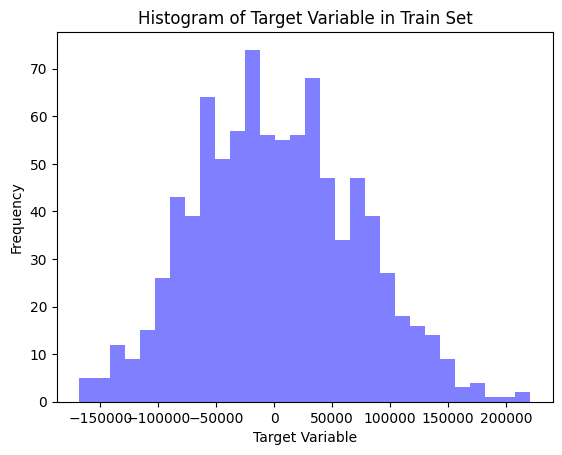

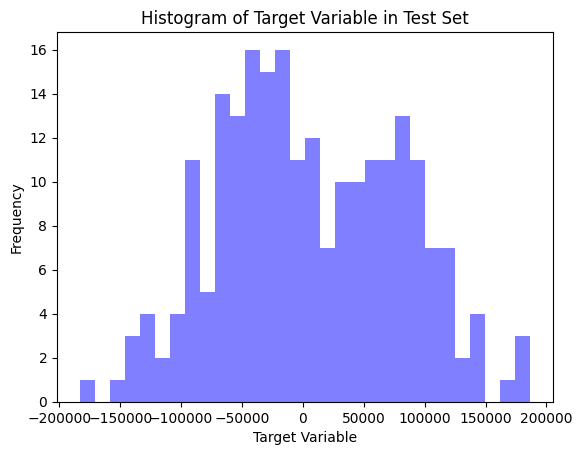

alpha: 10.000000
Train R2 score: 0.563271326613143
Test R2 score: 0.49712825710900055
r2: 0.497128


<ipython-input-24-8033cbac14ba>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-24-8033cbac14ba>:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


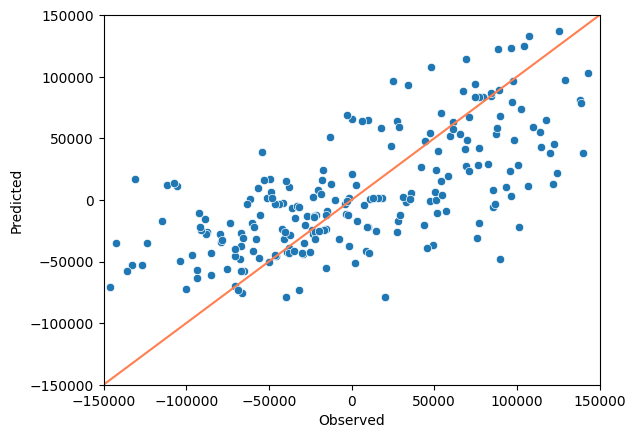

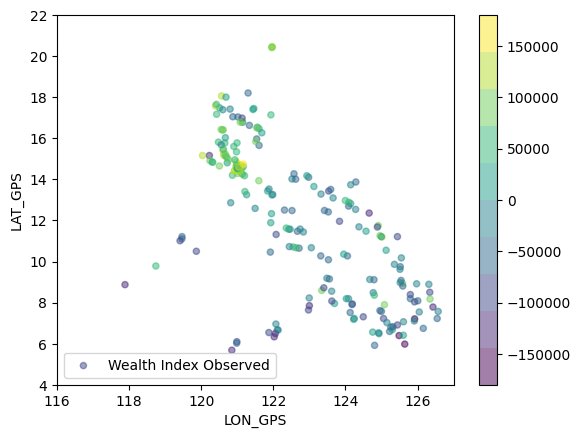

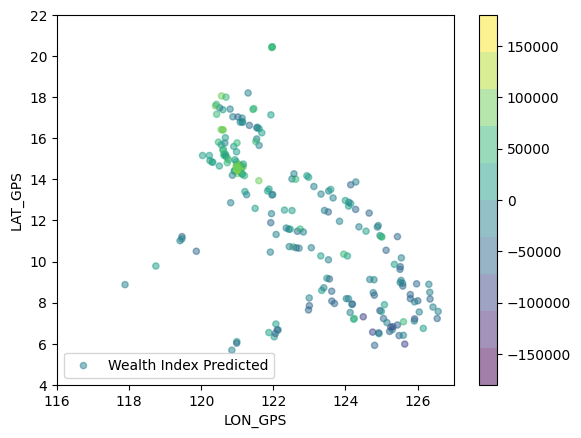

In [ ]:
# WEALTH INDEX 

#assign variables
data = matched_threshold.values
X, y = data[:, 2:4004], data[:,4005]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


# Plot the histogram of the target variable
plt.hist(y_train, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Train Set')
plt.show()

# Plot the histogram of the target variable
plt.hist(y_test, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Test Set')
plt.show()

# Ridge Regression

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train) #Predicts y from x train
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test) #Predicts y from x test
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-180000, 180000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])
# Show the plot
plt.show()

In [20]:
matched_threshold1 = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 500]
matched_threshold = matched_threshold1.groupby('MOSAIKSID').mean()
print(len(matched_threshold))

957


<ipython-input-20-1fce6f4fc9d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matched_threshold = matched_threshold1.groupby('MOSAIKSID').mean()


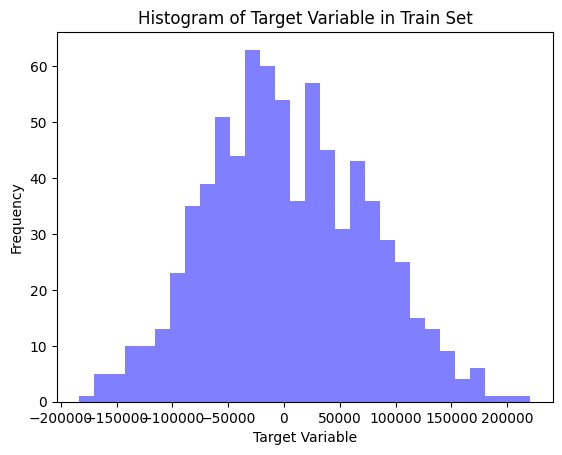

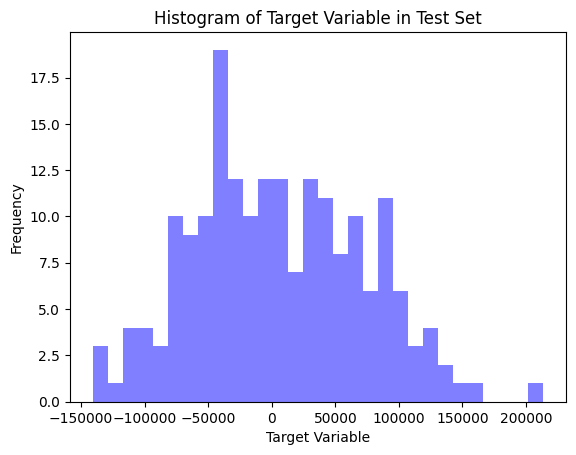

alpha: 10.000000
Train R2 score: 0.5565674371763087
Test R2 score: 0.47868161837292844
r2: 0.478682


<ipython-input-21-8033cbac14ba>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-21-8033cbac14ba>:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


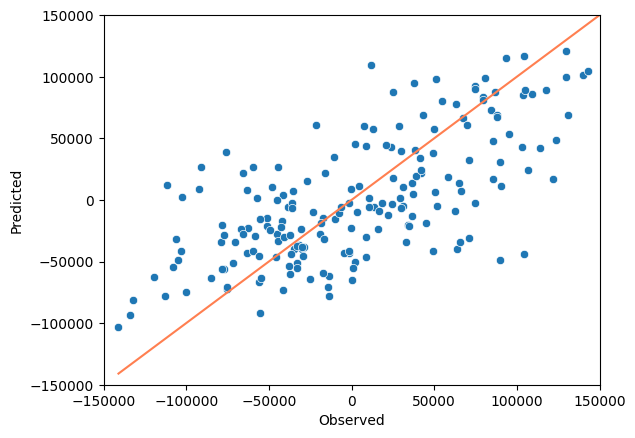

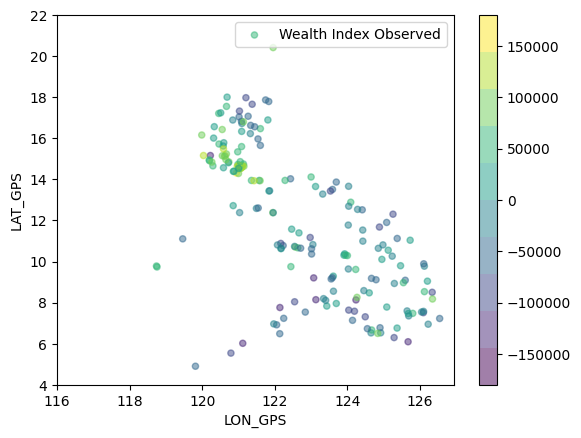

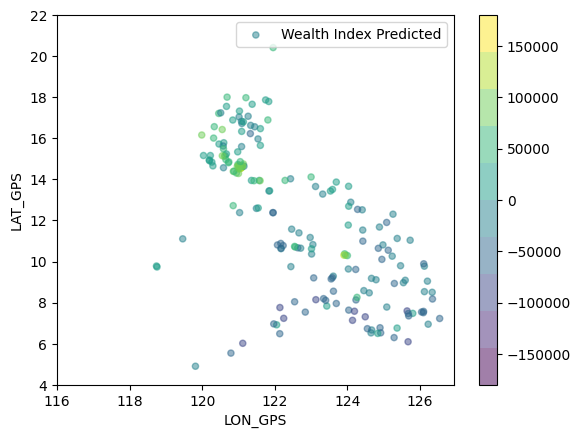

In [21]:
# WEALTH INDEX 

#assign variables
data = matched_threshold.values
X, y = data[:, 2:4004], data[:,4005]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


# Plot the histogram of the target variable
plt.hist(y_train, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Train Set')
plt.show()

# Plot the histogram of the target variable
plt.hist(y_test, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Test Set')
plt.show()

# Ridge Regression

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train) #Predicts y from x train
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test) #Predicts y from x test
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-180000, 180000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])
# Show the plot
plt.show()

In [22]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot


,LAT_GPS,LON_GPS,predicted,observed,residual
0,15.597995,121.085891,-13090.035860,36618.045455,49708.081314
1,10.290334,124.001838,68631.275223,43155.058824,25476.216399
2,7.233872,122.246999,-73462.924579,-41293.950000,32168.974579
3,12.380682,121.947158,-44099.060726,104390.260870,148489.321595
4,13.947881,121.572590,10653.163884,30832.117647,20178.953763
...,...,...,...,...,...
187,14.535013,121.005020,87589.095651,24905.428571,62683.667080
188,7.466659,125.679201,-54927.607593,888.363636,55815.971230
189,15.483918,120.586910,68704.693475,131027.625000,62322.931525
190,16.804842,121.136523,24465.427420,106722.076923,82256.649503


In [ ]:
# Saving the final csv so we can inspect it

map_plot.to_csv('mean_500', index=False)
map_plot.to_csv(file_path + 'matched_with_ind.csv')

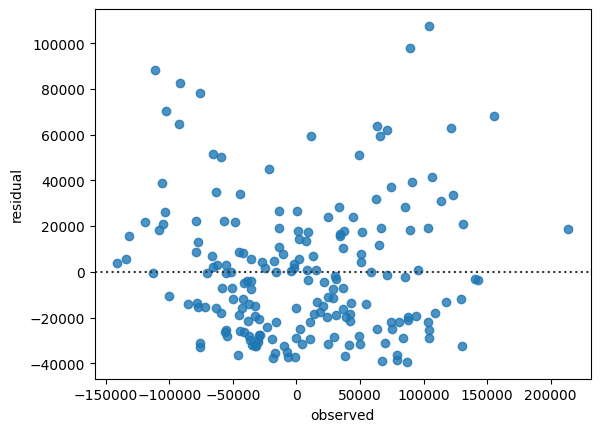

In [ ]:
sns.residplot(x='observed', y='residual', data=map_plot)
plt.show()


In [ ]:
matched_threshold1 = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 555]
matched_threshold = matched_threshold1.groupby('MOSAIKSID').mean()
print(len(matched_threshold))

1071


<ipython-input-29-4d629bc096d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matched_threshold = matched_threshold1.groupby('MOSAIKSID').mean()


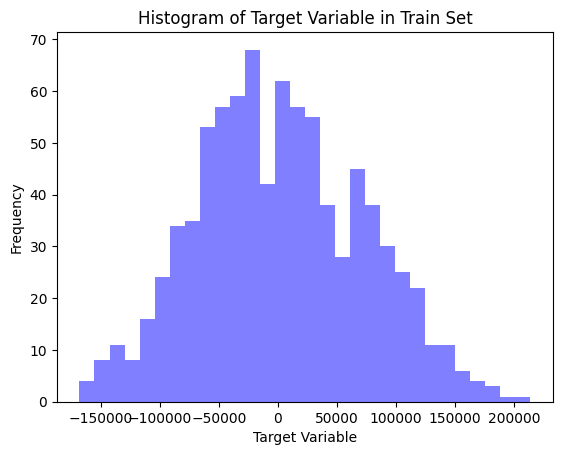

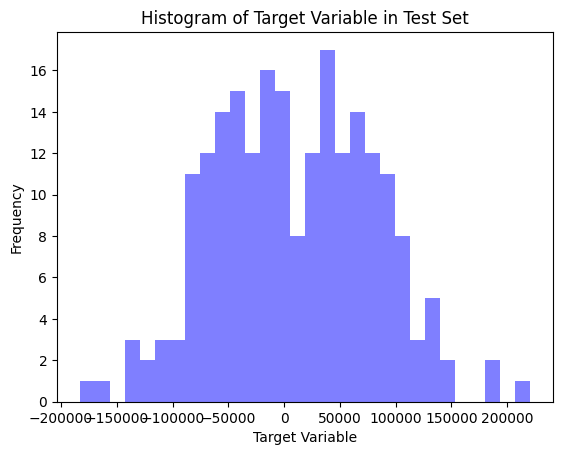

alpha: 10.000000
Train R2 score: 0.5643778666959225
Test R2 score: 0.514381666185437
r2: 0.514382


<ipython-input-30-8033cbac14ba>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-30-8033cbac14ba>:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


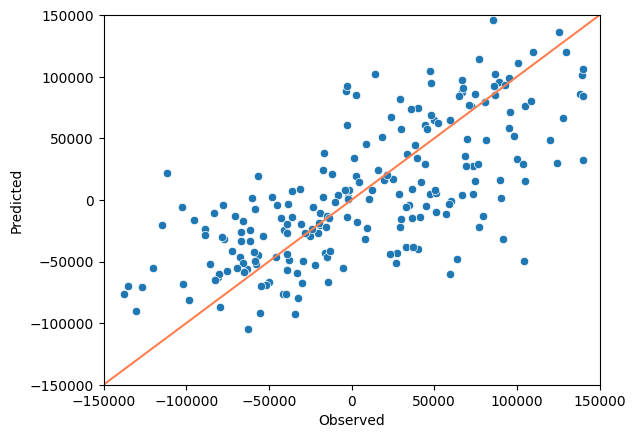

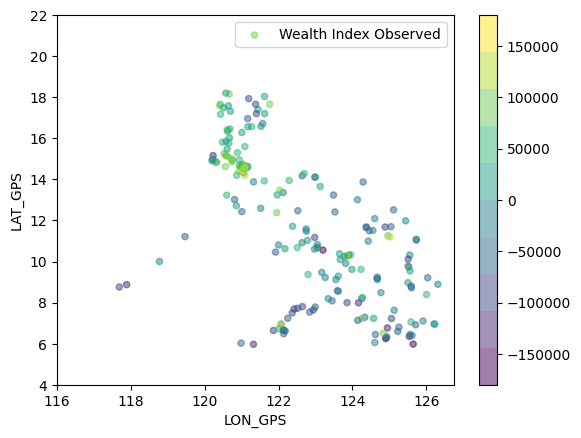

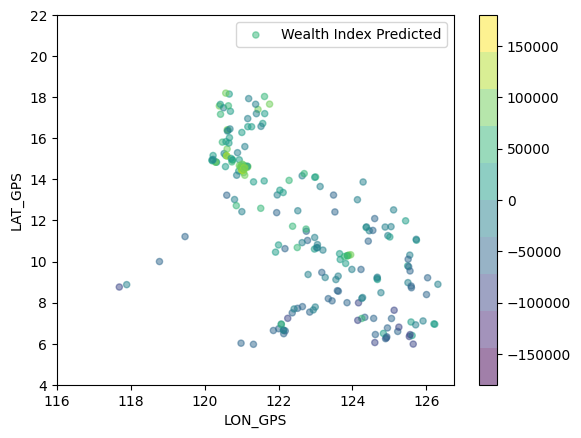

In [ ]:
# WEALTH INDEX 

#assign variables
data = matched_threshold.values
X, y = data[:, 2:4004], data[:,4005]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


# Plot the histogram of the target variable
plt.hist(y_train, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Train Set')
plt.show()

# Plot the histogram of the target variable
plt.hist(y_test, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Test Set')
plt.show()

# Ridge Regression

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train) #Predicts y from x train
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test) #Predicts y from x test
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-180000, 180000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])
# Show the plot
plt.show()

**MEDIAN**

In [ ]:
matched_threshold1 = matched_with_ind
matched_threshold = matched_threshold1.groupby('MOSAIKSID').median()
print(len(matched_threshold))


1122


<ipython-input-31-9dacb43a8aaa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matched_threshold = matched_threshold1.groupby('MOSAIKSID').median()


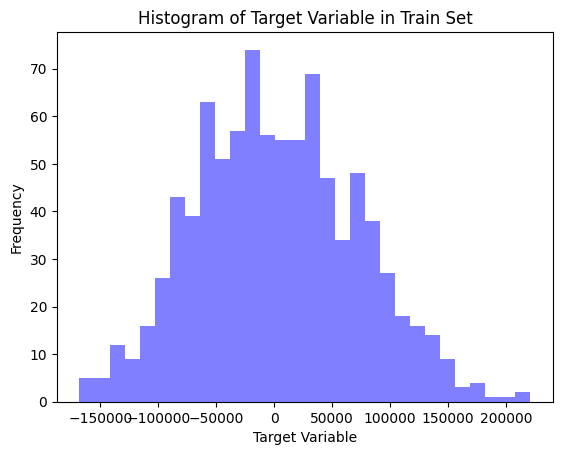

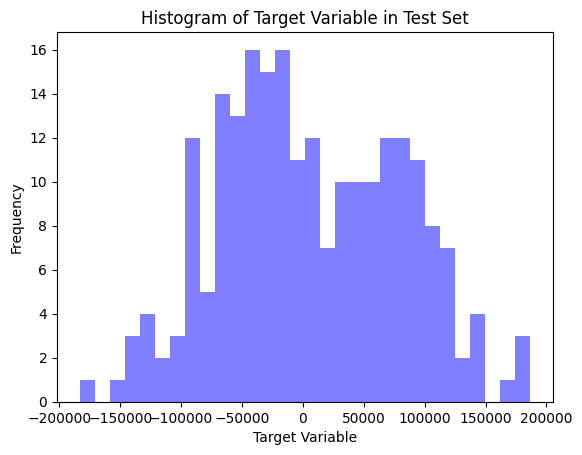

alpha: 10.000000
Train R2 score: 0.5639926403617238
Test R2 score: 0.5013305482804391
r2: 0.501331


<ipython-input-32-8033cbac14ba>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-32-8033cbac14ba>:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


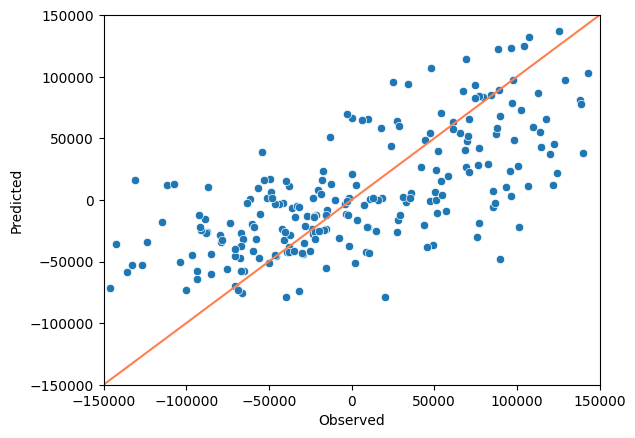

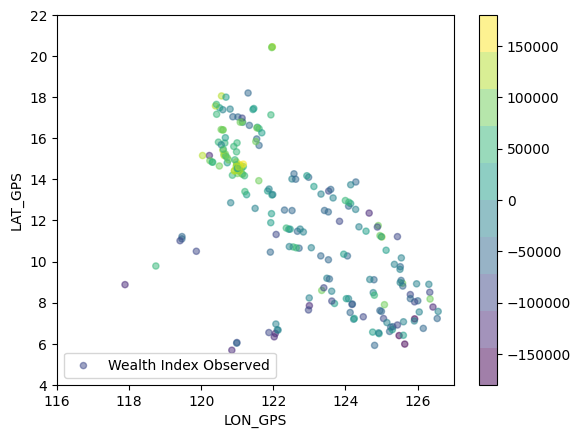

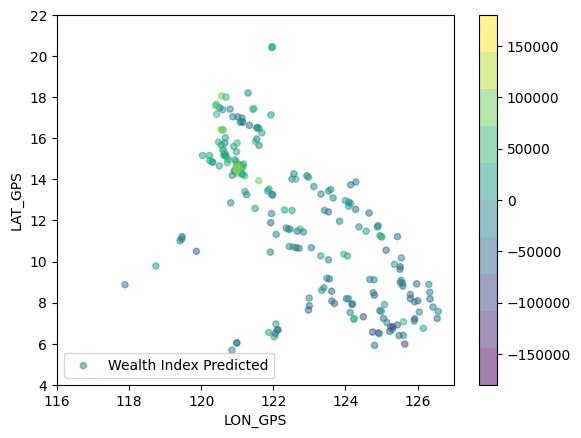

In [ ]:
# WEALTH INDEX 

#assign variables
data = matched_threshold.values
X, y = data[:, 2:4004], data[:,4005]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


# Plot the histogram of the target variable
plt.hist(y_train, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Train Set')
plt.show()

# Plot the histogram of the target variable
plt.hist(y_test, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Test Set')
plt.show()

# Ridge Regression

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train) #Predicts y from x train
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test) #Predicts y from x test
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-180000, 180000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])
# Show the plot
plt.show()

In [ ]:
matched_threshold1 = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 500]
matched_threshold = matched_threshold1.groupby('MOSAIKSID').median()
print(len(matched_threshold))

957


<ipython-input-33-09abb5d97092>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matched_threshold = matched_threshold1.groupby('MOSAIKSID').median()


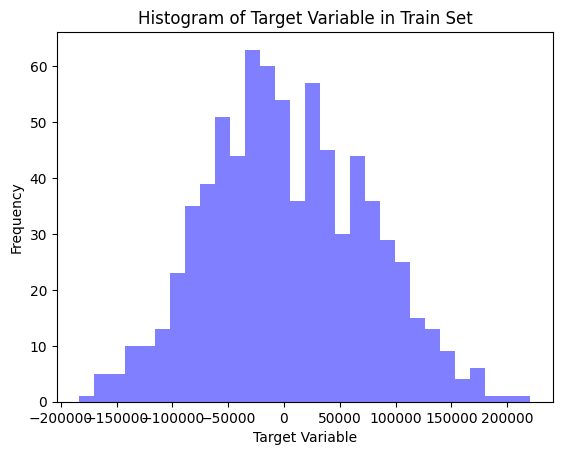

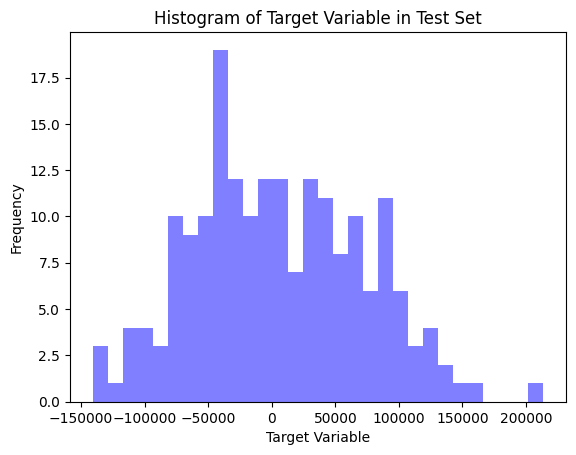

alpha: 10.000000
Train R2 score: 0.5570008439121479
Test R2 score: 0.47862222971079615
r2: 0.478622


<ipython-input-34-8033cbac14ba>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-34-8033cbac14ba>:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


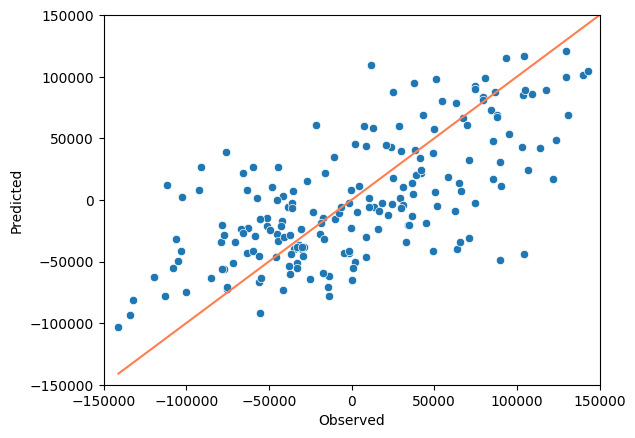

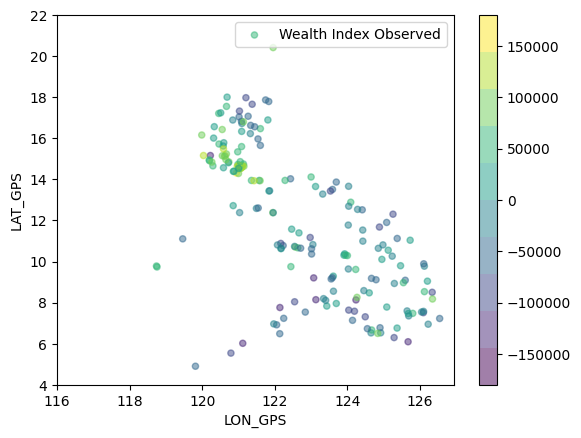

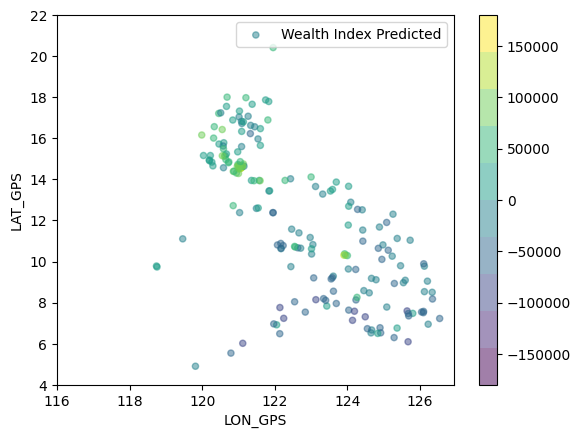

In [ ]:
# WEALTH INDEX 

#assign variables
data = matched_threshold.values
X, y = data[:, 2:4004], data[:,4005]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


# Plot the histogram of the target variable
plt.hist(y_train, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Train Set')
plt.show()

# Plot the histogram of the target variable
plt.hist(y_test, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Test Set')
plt.show()

# Ridge Regression

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train) #Predicts y from x train
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test) #Predicts y from x test
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-180000, 180000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])
# Show the plot
plt.show()

In [ ]:
matched_threshold1 = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 555]
matched_threshold = matched_threshold1.groupby('MOSAIKSID').median()
print(len(matched_threshold))

1071


<ipython-input-35-cab7e926c106>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matched_threshold = matched_threshold1.groupby('MOSAIKSID').median()


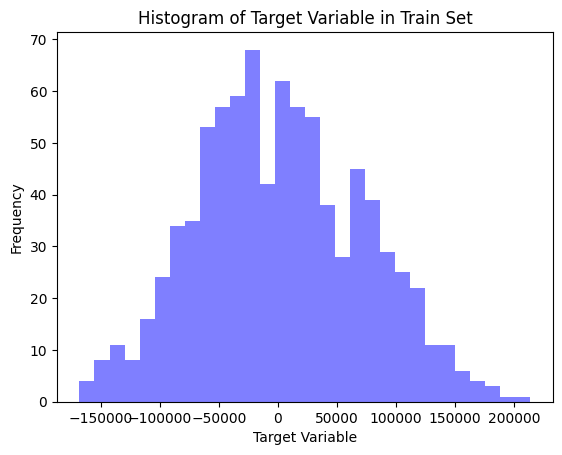

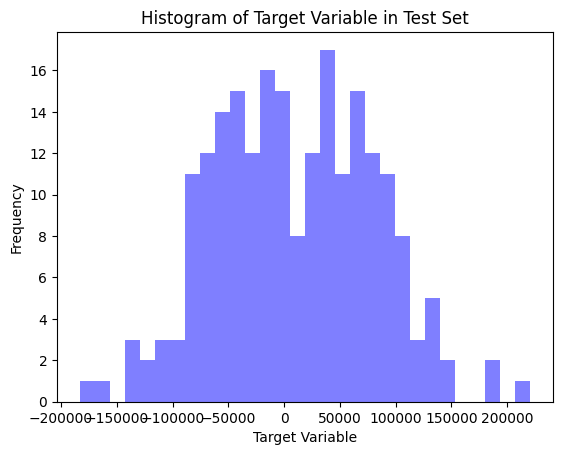

alpha: 10.000000
Train R2 score: 0.5642786866930967
Test R2 score: 0.5162415985454205
r2: 0.516242


<ipython-input-36-8033cbac14ba>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-36-8033cbac14ba>:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


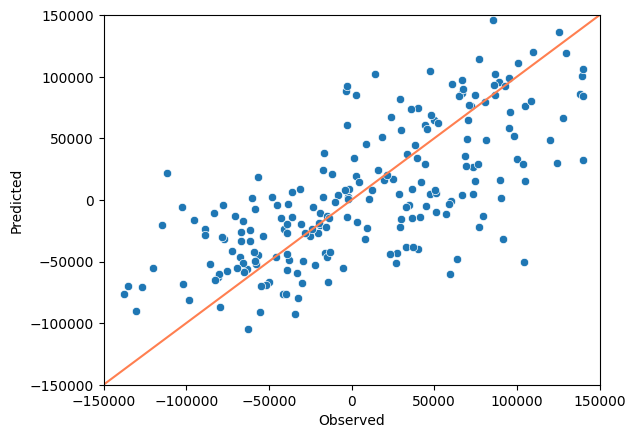

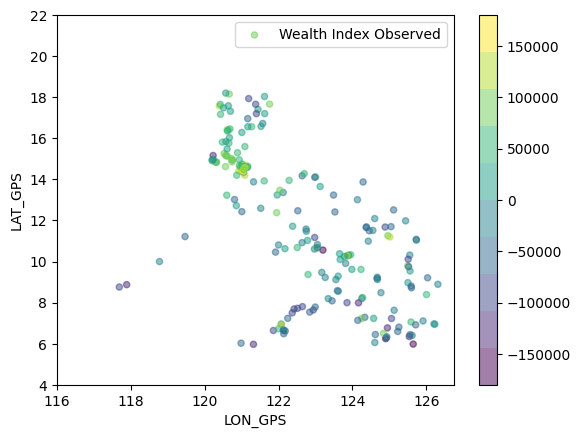

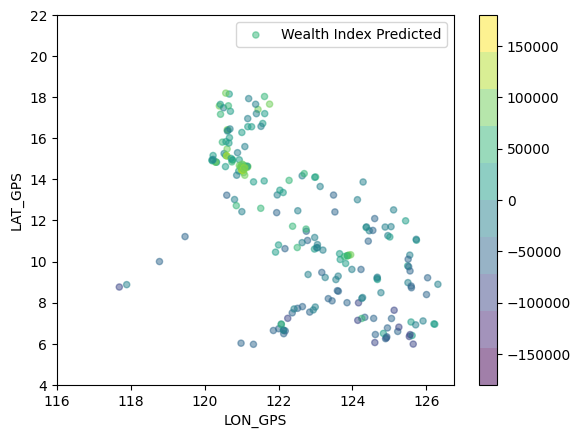

In [ ]:
# WEALTH INDEX 

#assign variables
data = matched_threshold.values
X, y = data[:, 2:4004], data[:,4005]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)


# Plot the histogram of the target variable
plt.hist(y_train, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Train Set')
plt.show()

# Plot the histogram of the target variable
plt.hist(y_test, bins=30, alpha=0.5, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable in Test Set')
plt.show()

# Ridge Regression

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train) #Predicts y from x train
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test) #Predicts y from x test
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-180000, 180000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)
plt.yticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22]) 
plt.xticks([116, 118, 120, 122, 124, 126])
# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,14.952262,120.756680,51656.441489,98080.695652,46424.254163
1,14.117183,123.001517,64607.938561,50035.120000,14572.818561
2,16.397146,120.632228,4162.750019,67020.400000,62857.649981
3,14.510264,121.030858,87190.619506,66771.650000,20418.969506
4,9.222964,123.261420,-29331.247425,-25044.000000,4287.247425
...,...,...,...,...,...
210,6.662256,122.132027,-14059.601808,-2855.375000,11204.226808
211,6.333842,124.929423,-55562.487886,-4982.863636,50579.624250
212,8.246866,124.273486,-3297.610772,59033.700000,62331.310772
213,15.021213,120.715562,4441.520850,73636.370370,69194.849521


In [ ]:
# Saving the final csv so we can inspect it

map_plot.to_csv('map_plot', index=False)
map_plot.to_csv(file_path + 'map_plot.csv')